In [4]:
import pyart
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [5]:
radar = pyart.io.read_nexrad_archive("../assets/KHTX20150420_054230_V06.gz")
gf = pyart.correct.despeckle_field(radar,"reflectivity")

## No despeckle

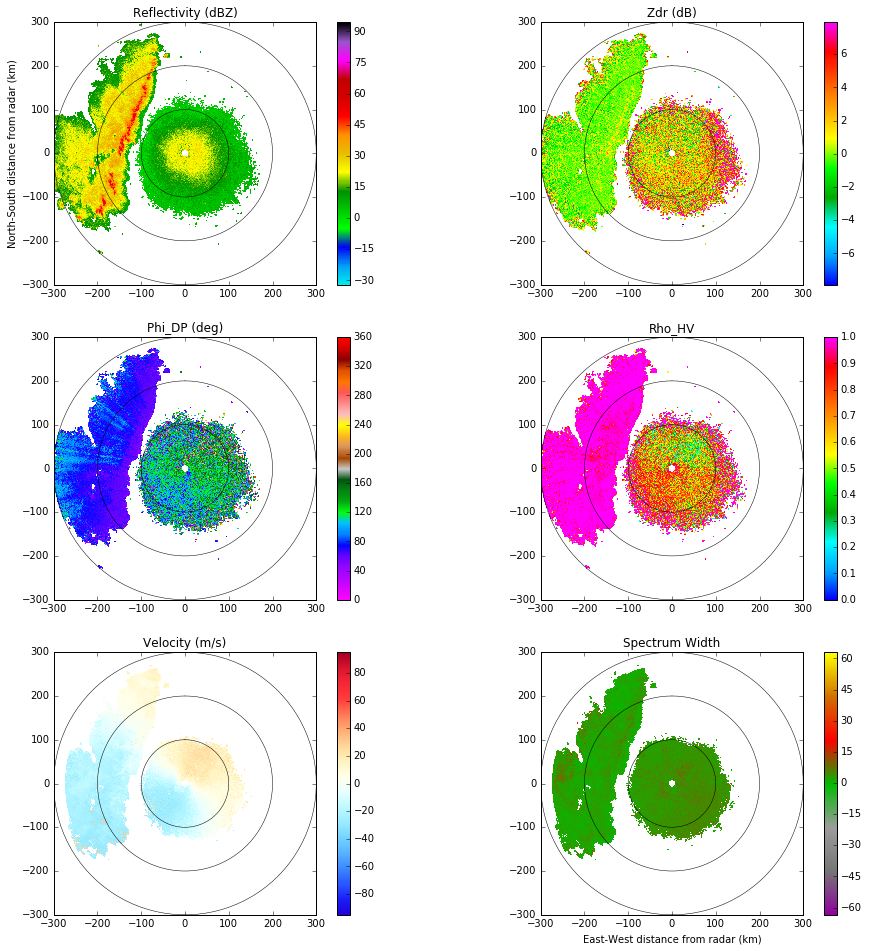

In [8]:
# display the lowest elevation scan data
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(16, 16))

plots = [
    # variable-name in pyart, display-name that we want, sweep-number of radar (0=lowest ref, 1=lowest velocity)
    ['reflectivity', 'Reflectivity (dBZ)', 0],
    ['differential_reflectivity', 'Zdr (dB)', 0],
    ['differential_phase', 'Phi_DP (deg)', 0],
    ['cross_correlation_ratio', 'Rho_HV', 0],
    ['velocity', 'Velocity (m/s)', 1],
    ['spectrum_width', 'Spectrum Width', 1]
]

def plot_radar_images(plots):
    ncols = 2
    nrows = len(plots)/2
    
    for plotno, plot in enumerate(plots, start=1):
        ax = fig.add_subplot(nrows, ncols, plotno)
        display.plot(plot[0], plot[2], ax=ax, title=plot[1],
                 colorbar_label='',
                 axislabels=('East-West distance from radar (km)' if plotno == 6 else '', 
                             'North-South distance from radar (km)' if plotno == 1 else ''))
        
        display.set_limits((-300, 300), (-300, 300), ax=ax)
        display.set_aspect_ratio('equal', ax=ax)
        display.plot_range_rings(range(100, 350, 100), lw=0.5, col='black', ax=ax)
    plt.show()

plot_radar_images(plots)

## despeckle

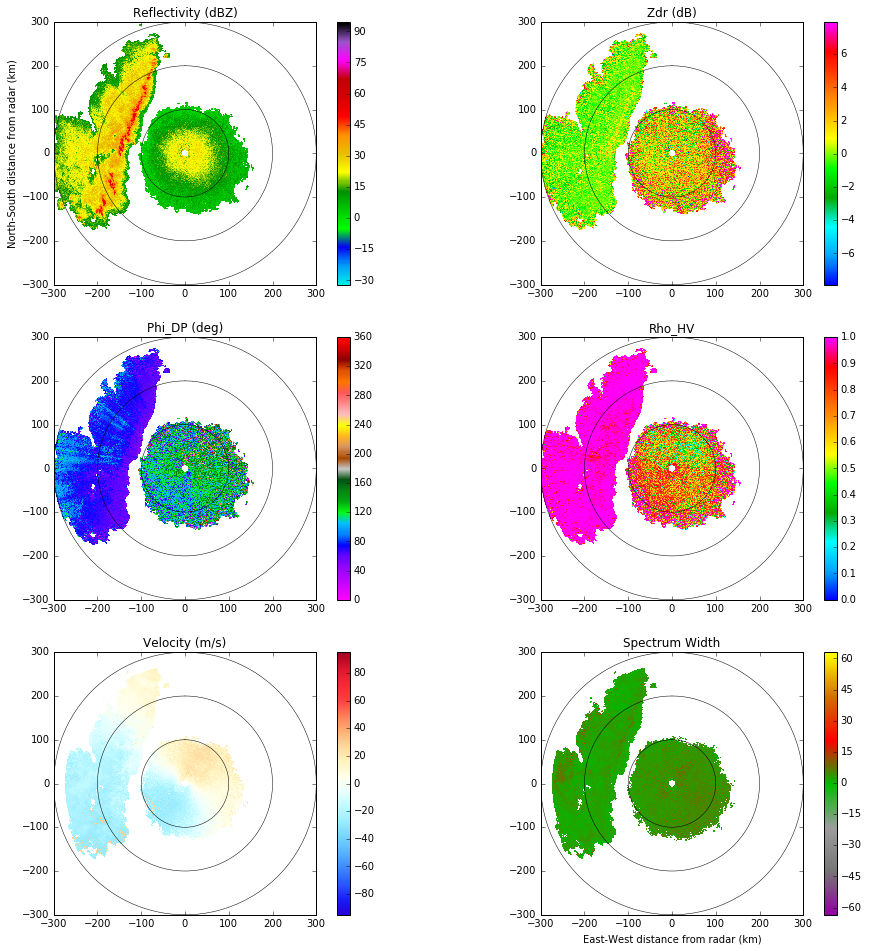

In [9]:
# display the lowest elevation scan data
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(16, 16))

plots = [
    # variable-name in pyart, display-name that we want, sweep-number of radar (0=lowest ref, 1=lowest velocity)
    ['reflectivity', 'Reflectivity (dBZ)', 0],
    ['differential_reflectivity', 'Zdr (dB)', 0],
    ['differential_phase', 'Phi_DP (deg)', 0],
    ['cross_correlation_ratio', 'Rho_HV', 0],
    ['velocity', 'Velocity (m/s)', 1],
    ['spectrum_width', 'Spectrum Width', 1]
]

def plot_radar_images(plots):
    ncols = 2
    nrows = len(plots)/2
    
    for plotno, plot in enumerate(plots, start=1):
        ax = fig.add_subplot(nrows, ncols, plotno)
        display.plot(plot[0], plot[2], ax=ax, title=plot[1],
                 colorbar_label='', gatefilter=gf,
                 axislabels=('East-West distance from radar (km)' if plotno == 6 else '', 
                             'North-South distance from radar (km)' if plotno == 1 else ''))

        display.set_limits((-300, 300), (-300, 300), ax=ax)
        display.set_aspect_ratio('equal', ax=ax)
        display.plot_range_rings(range(100, 350, 100), lw=0.5, col='black', ax=ax)
    plt.show()

plot_radar_images(plots)